In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt
# import numpy as np
# import datetime as dt
# import pandas_datareader as pdr

In [3]:
path = "TATAMOTORS.NS.csv"
df = pd.read_csv(path)
# data1 = pd.read_csv("data.csv")
data2 = pd.read_csv("df2.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-23,103.000000,106.000000,101.900002,104.400002,104.400002,68638552.0
1,2020-06-24,105.250000,110.800003,104.199997,104.800003,104.800003,125457492.0
2,2020-06-25,103.849998,106.300003,101.650002,103.800003,103.800003,63198285.0
3,2020-06-26,105.400002,106.050003,100.349998,101.400002,101.400002,56327855.0
4,2020-06-29,101.400002,101.400002,98.050003,99.449997,99.449997,43274006.0
...,...,...,...,...,...,...,...
247,2021-06-17,348.399994,352.899994,342.250000,345.649994,345.649994,29236974.0
248,2021-06-18,345.649994,346.899994,329.000000,337.399994,337.399994,49440514.0
249,2021-06-21,330.899994,335.799988,326.200012,334.299988,334.299988,29123887.0
250,2021-06-22,337.100006,344.299988,336.149994,337.899994,337.899994,26708459.0


In [4]:
avg_open = df.Open.median()
avg_high = df.High.median()
avg_low = df.Low.median()
avg_close = df.Close.median()

In [5]:
df.Open = df.Open.fillna(avg_open)
df.High = df.High.fillna(avg_high)
df.Low = df.Low.fillna(avg_low)
df.Close = df.Close.fillna(avg_close)

In [6]:
reg = LinearRegression()
reg.fit(df[["Open", "High", "Low"]], df.Close)

LinearRegression()

In [7]:
reg.predict([[93, 96.400002, 91.800003]])[0]

94.71187984667063

In [8]:
# with open('module_pickle', 'wb') as f:
#     pickle.dump(reg, f)

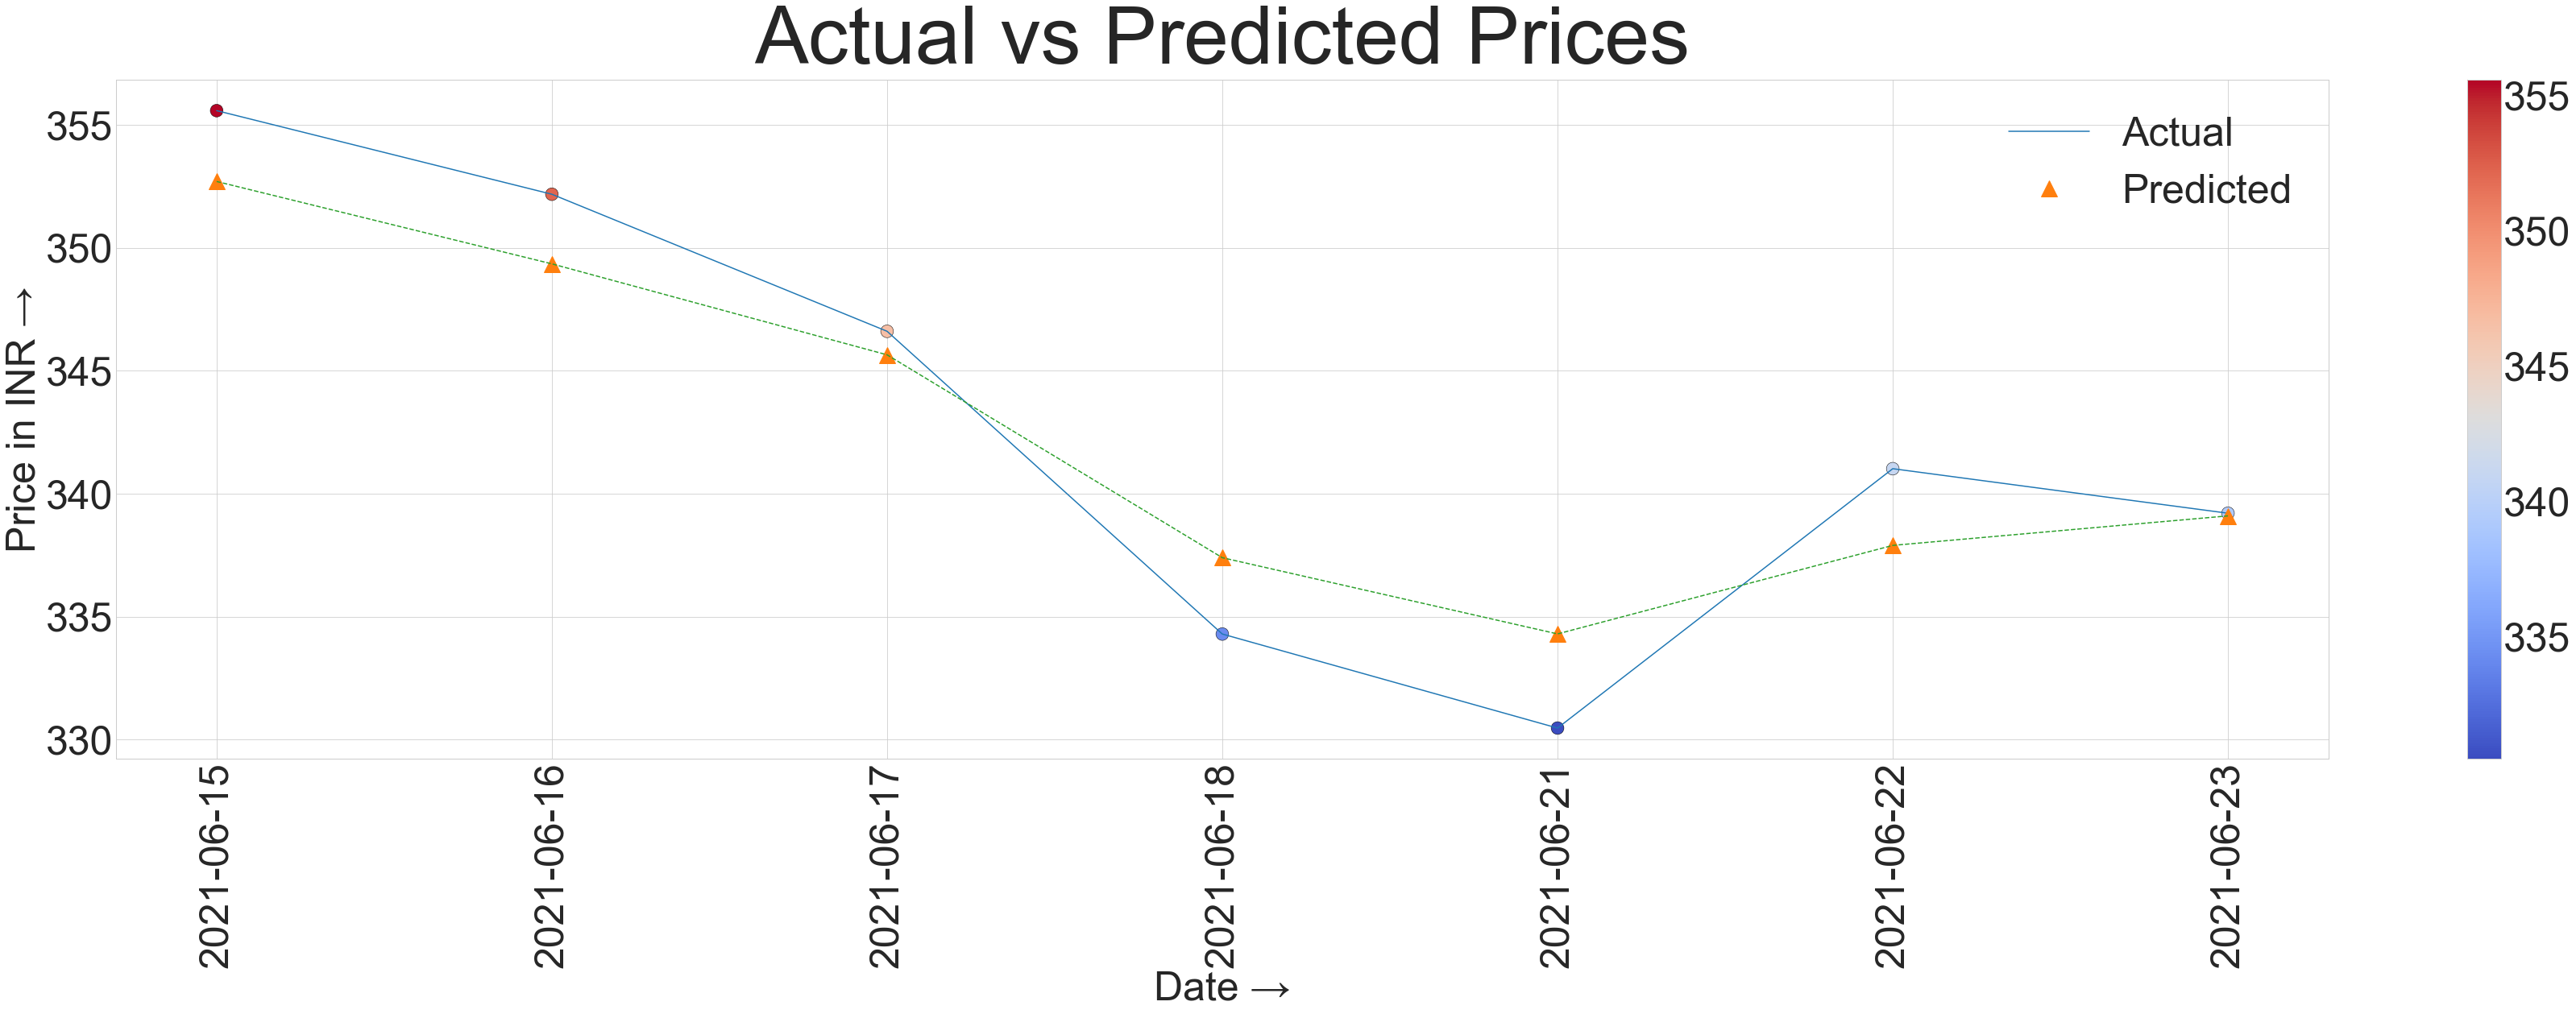

In [12]:
# name = ["TATAMOTORS.NS"]
plt.style.use("seaborn-whitegrid")
fig = plt.gcf()
fig.set_size_inches(50, 15)
# data = pdr.get_data_yahoo(name, start="2020-06-17")['Close']
plt.title("Actual vs Predicted Prices", fontsize=100)
plt.xlabel("Date →", fontsize=50)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.xticks(rotation=90)
plt.ylabel("Price in INR →", fontsize=50)
plt.tight_layout()
cmap = "coolwarm"
last = int(-7)
plt.scatter(data2["Date"][last:], data2["TATAMOTORS.NS"][last:], marker=".", c=data2["TATAMOTORS.NS"][last:], 
            cmap=cmap, edgecolor="black", linewidth=0.5, s=1000)

plt.plot(data2["Date"][last:], data2["TATAMOTORS.NS"][last:], '-', markersize=2000)

plt.plot(df["Date"][last:], df["Close"][last:], '^', markersize=20)
plt.plot(df["Date"][last:], df["Close"][last:], "--", markersize=30)


plt.legend(["Actual", "Predicted"], loc=1, prop={'size': 50})

plt.colorbar().ax.tick_params(labelsize=50)

plt.savefig("graph.svg", dpi=500, bbox_inches="tight");

In [124]:
# PRE_CLOSE = []
# for i in range(len(df["Close"])):
#     temp = (df["Date"][i], reg.predict([[df["Open"][i], df["High"][i], df["Low"][i]]])[0])
#     PRE_CLOSE.append(temp)
    
# df2 = pd.DataFrame(PRE_CLOSE, columns=["Date", "TATAMOTORS.NS"])

In [138]:
# df2.to_csv(r".\df2.csv", index=False)